<a href="https://colab.research.google.com/github/npselvan/StockInventory/blob/stockphase1/NLP_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size':'10'})

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data=pd.read_csv('/content/drive/MyDrive/Tweets.csv')

In [5]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [6]:
data.shape

(14640, 15)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [8]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
tweet_id,14640,NaN,NaN,NaN,5.69218e+17,7.79111e+14,5.67588e+17,5.68559e+17,5.69478e+17,5.6989e+17,5.70311e+17
airline_sentiment,14640,3,negative,9178,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment_confidence,14640,NaN,NaN,NaN,0.900169,0.16283,0.335,0.6923,1,1,1
negativereason,9178,10,Customer Service Issue,2910,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negativereason_confidence,10522,NaN,NaN,NaN,0.638298,0.33044,0,0.3606,0.6706,1,1
airline,14640,6,United,3822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airline_sentiment_gold,40,3,negative,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,14640,7701,JetBlueNews,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN
negativereason_gold,32,13,Customer Service Issue,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,14640,NaN,NaN,NaN,0.0826503,0.745778,0,0,0,0,44


In [9]:
df=data.copy()

In [10]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [11]:
df.drop(columns=['tweet_id', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'], axis=1, inplace=True)

In [12]:
df.columns

Index(['airline_sentiment', 'text'], dtype='object')

In [13]:
df.isnull().sum()

airline_sentiment    0
text                 0
dtype: int64

In [14]:
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [15]:
df.shape

(14640, 2)

In [16]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [17]:
df['text'].nunique()

14427

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.airline_sentiment.value_counts()

negative    9087
neutral     3067
positive    2298
Name: airline_sentiment, dtype: int64

In [20]:
import re
import nltk

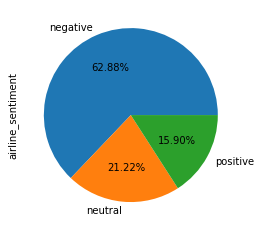

In [21]:
df.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.2f%%')

The tweet reflect close to 2 in 3 passengers are unhappy with the Airline Service. Only 16% of the Passengers are happy with the Airlines. 21% of the people expressed neutral airline services. 

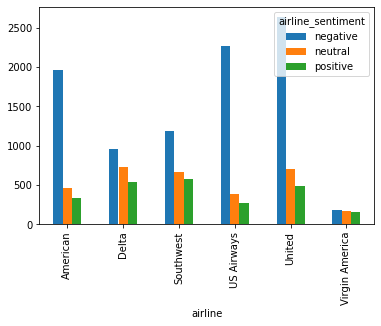

In [22]:
df2=data.groupby(['airline','airline_sentiment']).airline_sentiment.count().unstack()
df2.plot(kind='bar')

**Removing HTML Text**

In [29]:
from bs4 import BeautifulSoup
df3=df.copy()
df3['text'] = [BeautifulSoup(txt).get_text() for txt in df3['text']]

In [30]:
ahtml= '<html><head><body><h2>Welcome to BeautifulSoup Programming</h2></body></head></html>'
BeautifulSoup(ahtml).get_text()

'Welcome to BeautifulSoup Programming'

In [31]:
df3.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [33]:
df3[df3['text'].str.contains('<')==True]

,airline_sentiment,text
11,positive,@VirginAmerica I <3 pretty graphics. so much b...
88,neutral,@VirginAmerica I <3 Flying VA But Life happens...
378,positive,"@VirginAmerica For my Grandma Ella's 80th, she..."
466,positive,@VirginAmerica I don’t use Passbook =/ I still...
468,neutral,@VirginAmerica do you have an application for ...
490,positive,@VirginAmerica you guys are perfect as always!...
1552,negative,@united: thanks for the miserable trip GNV<<<...
3167,positive,@united 4 reFlight Booking Problemss in last ...
3794,positive,@united I am blown away by stellar #custserv !...
3844,negative,@united There are Exit-Row window shades in ap...


In [34]:
df3.iloc[11]

airline_sentiment                                             positive
text                 @VirginAmerica I <3 pretty graphics. so much b...
Name: 11, dtype: object

There is no any HTML tags in the text

### Tokenization

In [35]:
df3['token_text']=[BeautifulSoup(txt).get_text() for txt in df3['text']]

In [41]:
df3.shape

(14452, 3)

In [42]:
from nltk.tokenize import TweetTokenizer
tt=TweetTokenizer()
df3['tweet_tokens']=df3['token_text'].apply(tt.tokenize)
df3.head()

,airline_sentiment,text,token_text,tweet_tokens
0,neutral,@VirginAmerica What @dhepburn said.,@VirginAmerica What @dhepburn said.,"[@VirginAmerica, What, @dhepburn, said, .]"
1,positive,@VirginAmerica plus you've added commercials t...,@VirginAmerica plus you've added commercials t...,"[@VirginAmerica, plus, you've, added, commerci..."
2,neutral,@VirginAmerica I didn't today... Must mean I n...,@VirginAmerica I didn't today... Must mean I n...,"[@VirginAmerica, I, didn't, today, ..., Must, ..."
3,negative,@VirginAmerica it's really aggressive to blast...,@VirginAmerica it's really aggressive to blast...,"[@VirginAmerica, it's, really, aggressive, to,..."
4,negative,@VirginAmerica and it's a really big bad thing...,@VirginAmerica and it's a really big bad thing...,"[@VirginAmerica, and, it's, a, really, big, ba..."


**Remove Numbers from the text**

In [43]:
df3['text']= [re.sub(r'[0-9]',"",txt) for txt in df3['text']]


In [46]:
df3.iloc[11]

airline_sentiment                                             positive
text                 @VirginAmerica I < pretty graphics. so much be...
token_text           @VirginAmerica I <3 pretty graphics. so much b...
tweet_tokens         [@VirginAmerica, I, <3, pretty, graphics, ., s...
Name: 11, dtype: object

**Removing Special Characters, Punctuation Marks**

In [47]:
import string
df3['text']=[txt.translate(str.maketrans('','',string.punctuation)) for txt in df3['text']]
df3.head()

,airline_sentiment,text,token_text,tweet_tokens
0,neutral,VirginAmerica What dhepburn said,@VirginAmerica What @dhepburn said.,"[@VirginAmerica, What, @dhepburn, said, .]"
1,positive,VirginAmerica plus youve added commercials to ...,@VirginAmerica plus you've added commercials t...,"[@VirginAmerica, plus, you've, added, commerci..."
2,neutral,VirginAmerica I didnt today Must mean I need t...,@VirginAmerica I didn't today... Must mean I n...,"[@VirginAmerica, I, didn't, today, ..., Must, ..."
3,negative,VirginAmerica its really aggressive to blast o...,@VirginAmerica it's really aggressive to blast...,"[@VirginAmerica, it's, really, aggressive, to,..."
4,negative,VirginAmerica and its a really big bad thing a...,@VirginAmerica and it's a really big bad thing...,"[@VirginAmerica, and, it's, a, really, big, ba..."


In [48]:
df3[df3['text'].str.contains('!')]

,airline_sentiment,text,token_text,tweet_tokens


**Lower Case conversion**

In [49]:
df3['text']=[re.sub(r"[^a-zA-Z0-9]+", ' ',txt) for txt in df3['text']]
df3.head()

,airline_sentiment,text,token_text,tweet_tokens
0,neutral,VirginAmerica What dhepburn said,@VirginAmerica What @dhepburn said.,"[@VirginAmerica, What, @dhepburn, said, .]"
1,positive,VirginAmerica plus youve added commercials to ...,@VirginAmerica plus you've added commercials t...,"[@VirginAmerica, plus, you've, added, commerci..."
2,neutral,VirginAmerica I didnt today Must mean I need t...,@VirginAmerica I didn't today... Must mean I n...,"[@VirginAmerica, I, didn't, today, ..., Must, ..."
3,negative,VirginAmerica its really aggressive to blast o...,@VirginAmerica it's really aggressive to blast...,"[@VirginAmerica, it's, really, aggressive, to,..."
4,negative,VirginAmerica and its a really big bad thing a...,@VirginAmerica and it's a really big bad thing...,"[@VirginAmerica, and, it's, a, really, big, ba..."


In [50]:
df3['text']=[txt.lower() for txt in df3['text']]
df3.head()

,airline_sentiment,text,token_text,tweet_tokens
0,neutral,virginamerica what dhepburn said,@VirginAmerica What @dhepburn said.,"[@VirginAmerica, What, @dhepburn, said, .]"
1,positive,virginamerica plus youve added commercials to ...,@VirginAmerica plus you've added commercials t...,"[@VirginAmerica, plus, you've, added, commerci..."
2,neutral,virginamerica i didnt today must mean i need t...,@VirginAmerica I didn't today... Must mean I n...,"[@VirginAmerica, I, didn't, today, ..., Must, ..."
3,negative,virginamerica its really aggressive to blast o...,@VirginAmerica it's really aggressive to blast...,"[@VirginAmerica, it's, really, aggressive, to,..."
4,negative,virginamerica and its a really big bad thing a...,@VirginAmerica and it's a really big bad thing...,"[@VirginAmerica, and, it's, a, really, big, ba..."


In [51]:
from nltk.stem import PorterStemmer
porter=PorterStemmer()
df3['text'].apply(porter.stem)
df3.head(50)

,airline_sentiment,text,token_text,tweet_tokens
0,neutral,virginamerica what dhepburn said,@VirginAmerica What @dhepburn said.,"[@VirginAmerica, What, @dhepburn, said, .]"
1,positive,virginamerica plus youve added commercials to ...,@VirginAmerica plus you've added commercials t...,"[@VirginAmerica, plus, you've, added, commerci..."
2,neutral,virginamerica i didnt today must mean i need t...,@VirginAmerica I didn't today... Must mean I n...,"[@VirginAmerica, I, didn't, today, ..., Must, ..."
3,negative,virginamerica its really aggressive to blast o...,@VirginAmerica it's really aggressive to blast...,"[@VirginAmerica, it's, really, aggressive, to,..."
4,negative,virginamerica and its a really big bad thing a...,@VirginAmerica and it's a really big bad thing...,"[@VirginAmerica, and, it's, a, really, big, ba..."
5,negative,virginamerica seriously would pay a flight for...,@VirginAmerica seriously would pay $30 a fligh...,"[@VirginAmerica, seriously, would, pay, $, 30,..."
6,positive,virginamerica yes nearly every time i fly vx t...,"@VirginAmerica yes, nearly every time I fly VX...","[@VirginAmerica, yes, ,, nearly, every, time, ..."
7,neutral,virginamerica really missed a prime opportunit...,@VirginAmerica Really missed a prime opportuni...,"[@VirginAmerica, Really, missed, a, prime, opp..."
8,positive,virginamerica well i didnt but now i do d,"@virginamerica Well, I didn't…but NOW I DO! :-D","[@virginamerica, Well, ,, I, didn't, …, but, N..."
9,positive,virginamerica it was amazing and arrived an ho...,"@VirginAmerica it was amazing, and arrived an ...","[@VirginAmerica, it, was, amazing, ,, and, arr..."


In [52]:
from nltk.tokenize import word_tokenize, sent_tokenize
def stemTokenize(sentence):
  tokens=word_tokenize(sentence)
  print(tokens)
  stem_sentence=[]
  for word in tokens:
    print(word)
    stem_sentence.append(porter.stem(word))
    print(porter.stem(word))
    stem_sentence.append(" ")
    return "".join(stem_sentence)


In [55]:
df3.iloc[500].text

'virginamerica was wondering if you guys recieved my dm and were able to potentially respond asap'

In [56]:
nltk.download('punkt')
totalsentence="virginamerica was wondering if you guys recieved my dm and were able to potentially respond asap"
stemTokenize(totalsentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['virginamerica', 'was', 'wondering', 'if', 'you', 'guys', 'recieved', 'my', 'dm', 'and', 'were', 'able', 'to', 'potentially', 'respond', 'asap']
virginamerica
virginamerica


'virginamerica '